In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
data=pd.read_csv('/content/bicoin_data.csv')
data.head()

,Unnamed: 0,datetime,open,high,low,close
0,0,2021-10-02 14:40:00,47893.92969,47981.64062,47889.07812,47981.64062
1,1,2021-10-02 14:45:00,47926.17188,47959.01172,47898.03125,47942.94141
2,2,2021-10-02 14:50:00,47956.17969,48095.00000,47950.66016,48095.00000
3,3,2021-10-02 14:55:00,48060.30859,48100.98828,48006.01172,48011.07812
4,4,2021-10-02 15:00:00,47966.01172,48015.01953,47952.35938,47957.01172


In [ ]:
data=data.iloc[:,1:]

data.head()

,datetime,open,high,low,close
0,2021-10-02 14:40:00,47893.92969,47981.64062,47889.07812,47981.64062
1,2021-10-02 14:45:00,47926.17188,47959.01172,47898.03125,47942.94141
2,2021-10-02 14:50:00,47956.17969,48095.00000,47950.66016,48095.00000
3,2021-10-02 14:55:00,48060.30859,48100.98828,48006.01172,48011.07812
4,2021-10-02 15:00:00,47966.01172,48015.01953,47952.35938,47957.01172


In [ ]:
#I will choose Datetime as a index columns
data.index=data['datetime']
data=data.drop(['datetime'],axis=1)
data.head()

,open,high,low,close
datetime,,,,
2021-10-02 14:40:00,47893.92969,47981.64062,47889.07812,47981.64062
2021-10-02 14:45:00,47926.17188,47959.01172,47898.03125,47942.94141
2021-10-02 14:50:00,47956.17969,48095.00000,47950.66016,48095.00000
2021-10-02 14:55:00,48060.30859,48100.98828,48006.01172,48011.07812
2021-10-02 15:00:00,47966.01172,48015.01953,47952.35938,47957.01172


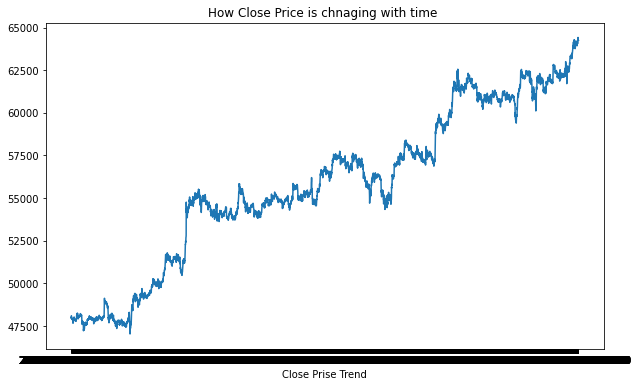

In [ ]:
# as i have to predict close prise for that so i will chose close columns only because i have to predict close prices
#first of all just visualise the close prise
plt.figure(figsize=(10,6))
plt.plot(data['close'])
plt.xlabel('Close Prise Trend')
plt.title('How Close Price is chnaging with time ')
plt.show()

We Will See how lag is dependent to our close price

In [ ]:
data['y_lag1']=data['close'].shift(periods=1)
data['y_lag2']=data['close'].shift(periods=2)
data['y_lag3']=data['close'].shift(periods=3)

In [ ]:
data.head()

,open,high,low,close,y_lag1,y_lag2,y_lag3
datetime,,,,,,,
2021-10-02 14:40:00,47893.92969,47981.64062,47889.07812,47981.64062,NaN,NaN,NaN
2021-10-02 14:45:00,47926.17188,47959.01172,47898.03125,47942.94141,47981.64062,NaN,NaN
2021-10-02 14:50:00,47956.17969,48095.00000,47950.66016,48095.00000,47942.94141,47981.64062,NaN
2021-10-02 14:55:00,48060.30859,48100.98828,48006.01172,48011.07812,48095.00000,47942.94141,47981.64062
2021-10-02 15:00:00,47966.01172,48015.01953,47952.35938,47957.01172,48011.07812,48095.00000,47942.94141


In [ ]:
#we will see dependecies of y_lag1,y_lag2,y_lag3 features with close price
data.fillna(0,inplace=True)
#we will make the data frame of close price and laged values
data_final=data.iloc[:,3:]
data_final.head()

,close,y_lag1,y_lag2,y_lag3
datetime,,,,
2021-10-02 14:40:00,47981.64062,0.00000,0.00000,0.00000
2021-10-02 14:45:00,47942.94141,47981.64062,0.00000,0.00000
2021-10-02 14:50:00,48095.00000,47942.94141,47981.64062,0.00000
2021-10-02 14:55:00,48011.07812,48095.00000,47942.94141,47981.64062
2021-10-02 15:00:00,47957.01172,48011.07812,48095.00000,47942.94141


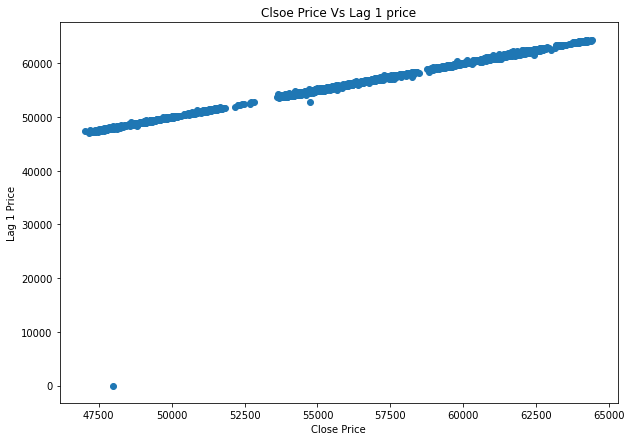

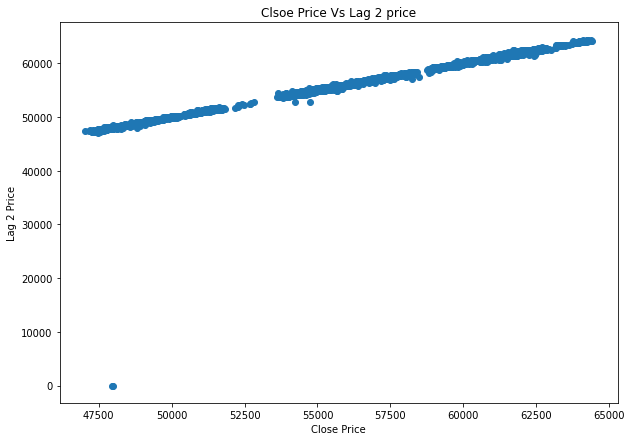

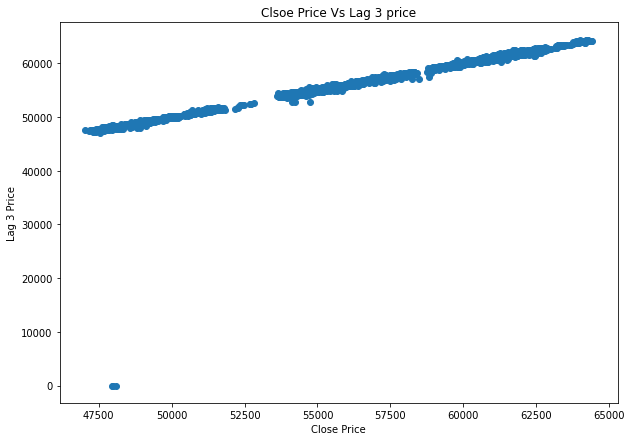

In [ ]:
#visualise correlation graph of close and lagged features
j=1
for i in data_final.columns:
  if i!='close':
    plt.figure(figsize=(10,7))
    plt.scatter(x=data_final['close'],y=data_final[i])
    plt.xlabel('Close Price')
    plt.ylabel(f'Lag {j} Price')
    plt.title(f'Clsoe Price Vs Lag {j} price')
    plt.show()
    j=j+1

In [ ]:
#higly correlated to each other 
#we can see correlation matrix
data_final.corr()

,close,y_lag1,y_lag2,y_lag3
close,1.000000,0.988930,0.978403,0.968282
y_lag1,0.988930,1.000000,0.989237,0.978988
y_lag2,0.978403,0.989237,1.000000,0.989527
y_lag3,0.968282,0.978988,0.989527,1.000000


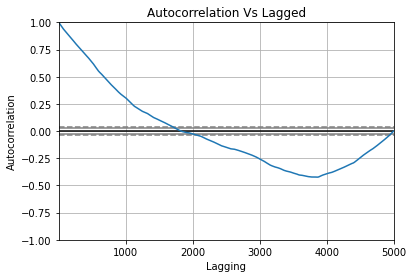

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['close'])
plt.title('Autocorrelation Vs Lagged')
plt.xlabel('Lagging')
plt.ylabel('Autocorrelation')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


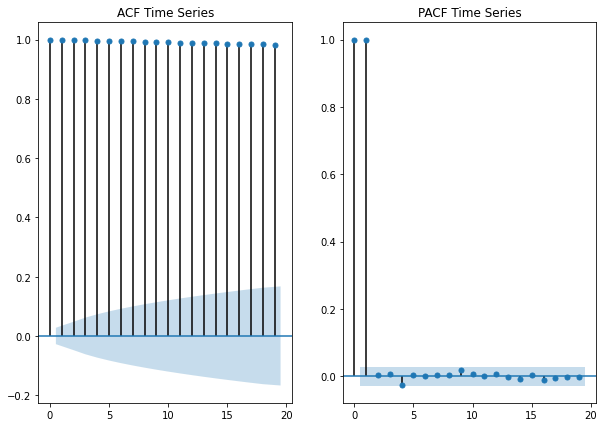

In [ ]:
# Auto correlation graph and Partial Auto Correlation Graph
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,7))
plot_acf(data_final['close'],lags=range(0,20),ax=ax[0])
plot_pacf(data_final['close'],lags=range(0,20),ax=ax[1])
ax[0].set_title('ACF Time Series')
ax[1].set_title('PACF Time Series')
plt.show()


##Statistical Test to Check If Variable is Time Dependent or not

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_final['close'].values.reshape(-1,1))
scaled_data.T

array([[-1.7101368 , -1.71862057, -1.68528579, ...,  1.85303032,
         1.86186519,  1.85626901]])

In [ ]:
from statsmodels.tsa.stattools import adfuller
x=scaled_data.T[0].flatten()
result=adfuller(x)
print('ADF statistic : %f '%result[0])
print('p-value : %f'%result[1])
print('critical values: ')
for i,j in result[4].items():
  print(f'{i}: {j.round(3)}')


ADF statistic : -0.671586 
p-value : 0.853973
critical values: 
1%: -3.432
5%: -2.862
10%: -2.567


As we accepting the null hypothesis becuse p-value>0.05.

Hence given series is non staionary or time dependent

In [ ]:
#lets do differencing to remove this trend and making it staionary
diff=data_final['close'].diff()
diff

datetime
2021-10-02 14:40:00          NaN
2021-10-02 14:45:00    -38.69921
2021-10-02 14:50:00    152.05859
2021-10-02 14:55:00    -83.92188
2021-10-02 15:00:00    -54.06640
                         ...    
2021-10-19 23:40:00     26.00000
2021-10-19 23:45:00    -49.39844
2021-10-19 23:50:00   -131.36328
2021-10-19 23:55:00     40.30078
2021-10-20 00:00:00    -25.52734
Name: close, Length: 5000, dtype: float64

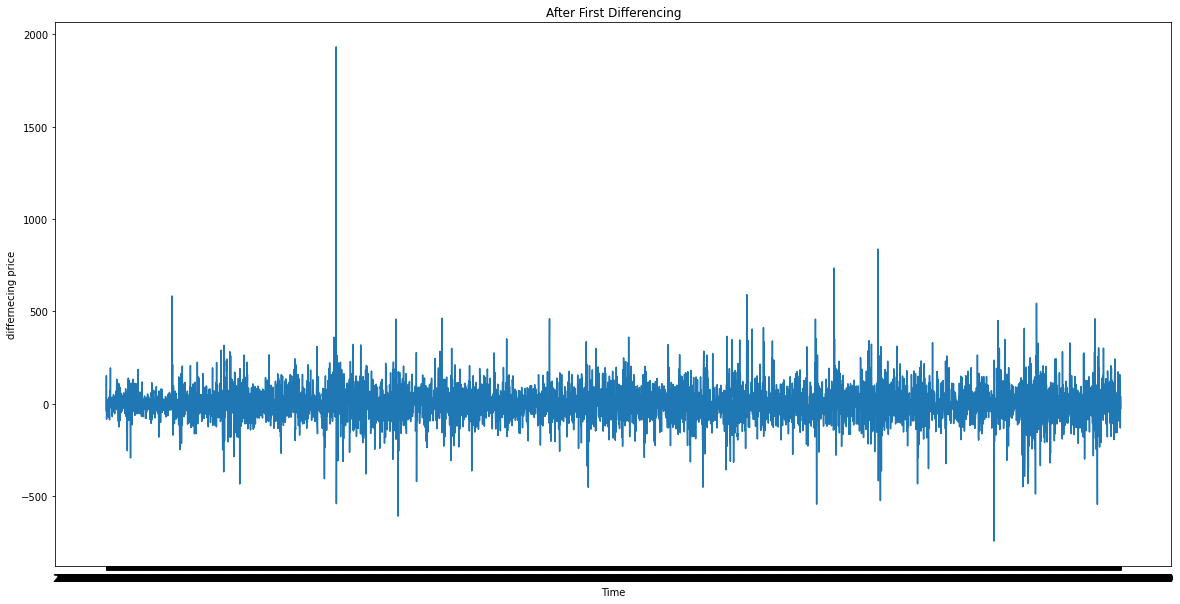

In [ ]:
#now lets do plot for vislaise
plt.figure(figsize=(20,10))
plt.plot(diff)
plt.xlabel('Time')
plt.ylabel('differnecing price')
plt.title('After First Differencing')
plt.show()


We can see that after First Differencing We get stationary series which has constand mean and variance.
So we can Apply ARMA and ARIMA model for forecasting the future price on it.

In [ ]:
#now lets test of staionary for differnecing series
diff=diff.dropna()
x=diff.values.flatten()
result=adfuller(x)
print('ADF statistic :', result[0])
print('p-value :',result[1])
print('critical values: ')
for i,j in result[4].items():
  print(f'{i}  : {j.round(3)}')


ADF statistic : -35.40660200709073
p-value : 0.0
critical values: 
1%  : -3.432
5%  : -2.862
10%  : -2.567


As we can see p-value<0.05 so we can say that strong avidence against the null hypothesis so we have to reject the null hypotheisi.

So given series is stationary.